## Binary Classification - Iris Dataset

In this notebook we perform binary classification using K Nearest Neighbors (K-NN) model.


### Dataset

We will use the iris dataset, which is a multivariate data set. 

This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica

There are 4 features: 
- sepal length (cm)
- sepal width (cm)
- petal length (cm)
- petal width (cm)

Total number of samples: 150

The target (label) is coded as follows:
- Setosa: 0
- Versicolor: 1
- Virginica: 2


The dataset is also known as Fisher's Iris data set as it was introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis".


<img src="https://cse.unl.edu/~hasan/IrisFlowers.png",width=800,height=400>




## Goals

We will use Scikit-Learn's K-NN classifier (KNeighborsClassifier) to detect the Iris-Virginica (2) type.

- Learn to use suitable performance measures
- Learn to do cross-validation
- Learn to do model selection via hyperparameter tuning



In [48]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, classification_report

## Load Data

First load the data and explore the feature names, target names, etc.

In [49]:
iris = datasets.load_iris()

# See the key values
print("\nKey Values: \n", list(iris.keys()))

# The feature names
print("\nFeature Names: \n", list(iris.feature_names))

# The target names
print("\nTarget Names: \n", list(iris.target_names))

# The target values (codes)
print("\nTarget Values: \n", list(iris.target))


Key Values: 
 ['feature_names', 'DESCR', 'target', 'filename', 'target_names', 'data']

Feature Names: 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target Names: 
 ['setosa', 'versicolor', 'virginica']

Target Values: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


## Create the Data Matrix (X) and the Target Vector (y)

Recall that our goal is to detect the Iris-Virginica (2) type.

Thus, we create a binary target vector by putting 1 if the target value is 2 (Iris-Virginica), else we put 0.

In [50]:
# Data Matrix
X = iris["data"]

# Target Vector
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

print(X.shape)
print(y.shape)

(150, 4)
(150,)


## Create Train and Test Dataset

In [51]:
# Spilt the dataset into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

## Create the K-NN Model & Vary K

We will create the K-NN model and fit the training data on the model.

### Choose optimum K

We determine the optimum K by evaluating the K-NN model for various values of K. 

The K-NN model is evaluated by computing a performance measure. There are various performamce measures for classification problems.

The sklearn KNeighborsClassifier model uses, by default, "accuracy" as the performance measure. However, in a skewed dataset, accuracy doesn't provide a good estimate of the performance of the model. We will have to use confusion matrix, precision, recall, f1 score, etc.

But for now, let's use KNeighborsClassifier's default accuracy score function to evalute the model's performance for various values of K.

In [52]:
# Set the the range of K 
neighbors = np.arange(1, 40)

# Two arrays to store training and test accuracies
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    
    # The "score" function returns the mean accuracy on the given train/test data and labels.
    # Note that "accuracy" may not be a good performance measure in a skewed data set
    # Thus, we need to do hyperparameter tuning by using better performance measures (e.g., f1 score, presision, recall)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 
    

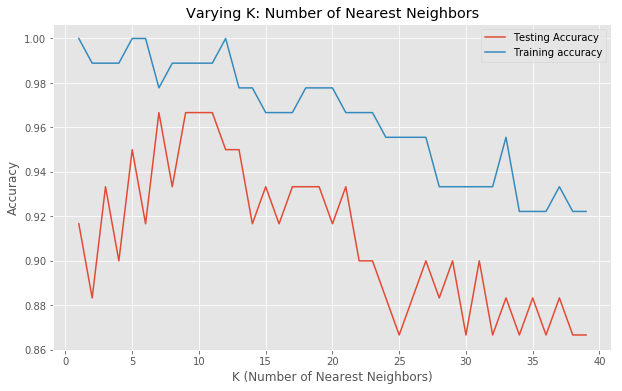

In [53]:
fig = plt.figure(figsize=(10, 6))
plt.title('Varying K: Number of Nearest Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('K (Number of Nearest Neighbors)')
plt.ylabel('Accuracy')
plt.show()

# Determine the Opimum K 

From the above diagram, find the the value of K that gives maximum accuracy on the test data.


#### <font color=red>A better alternative for finding optimal K is to perform model selection via cross validation.</font>

## Model Selection: Hyperparameter Tunining


A K-NN model is defined by a set of parameters: nearest neighbors (K), distance metric (p), etc. These are called hyperparameters.

We need to select the best model based on the optimal values of these hyperparameters. This process is called hyperparameter tuning.

The best way to do hyperparameter tuning is to use cross-validation.

We will use Scikit-Learn’s GridSearchCV to search the combinations of hyperparameter values that provide best performance.

We need to tell which hyperparameters we want the GridSearchCV to experiment with, and what values to try out. It will evaluate all the possible combinations of hyperparameter values, using cross-validation. 


## Important:

The GridSearchCV takes an argument to define the scoring metric (performance measure). 

See the list of possible scoring functions:
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

For multiclass classification, we may use "f1_micro" scoring function. The f1_micro function is the average of the F1 score of each class with weighting depending on the average parameter.

In the binary classification, f1 score function can be used. We may also use the precision, recall, roc_auc functions.



### Note: Experimenting with the Mahalanobis Distance Metric

Note that we cannot use the Mahalanobis distance metric as a parameter for the grid search.

Because for each iteration of the cross-validation, a new train fold is created which requires to compute the inverse of its covariance matrix.

With the sklearn grid search we cannot compute the inverse of the covariance matrix dynamically for each training fold.

Thus, unfortunately, we can't experiment with the Mahalanobis distance metric using the grid search.

In [54]:
%%time

warnings.filterwarnings('ignore')

# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values
param_grid = {'n_neighbors': np.arange(1,50), 'p': [1, 2, 10, 50, 100, 500, 1000], 
              'weights': ["uniform", "distance"]}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, param_grid, scoring='f1', cv=5)
knn_cv.fit(X_train, y_train)


params_optimal_knn = knn_cv.best_params_

print("Best Score: %f" % knn_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_knn)
print("\n")

Best Score: 1.000000
Optimal Hyperparameter Values:  {'n_neighbors': 4, 'weights': 'uniform', 'p': 10}


CPU times: user 18.2 s, sys: 672 ms, total: 18.9 s
Wall time: 16.4 s


## Select The Best Model 

Using the optimal hyperparameter values, create the best model.
Then, fit the model.

## Note on Using Mahalanobis Distance Metric:

Note that the Mahalanobis distance metric works only with the brute force algorithm in sklearn.

Also the data should not be scaled & normalized before using the Mahalanobis distance metric.

In [55]:
# With the Mahalanobis distance metric only the brute force algorithm works
#knn = KNeighborsClassifier(weights="uniform", algorithm='brute', n_neighbors=10, metric = "mahalanobis", metric_params= {'V': invCovariance_train})

# Minkowski distance metric based optimal model selected via hyperparameter tuning
knn = KNeighborsClassifier(**params_optimal_knn)
knn.fit(X_train, y_train) 

y_train_predicted = knn.predict(X_train)

train_accuracy_knn = np.mean(y_train_predicted == y_train)
print("\nTraining Accuracy: ", train_accuracy_knn)


Training Accuracy:  1.0


## Prediction

We can predict two types of values by using KNeighborsClassifier's two functions:
- Class (target) of the data using the predict() function
- Probabilities of belonging to all classes using the predict_proba() function

We will make these two types of predictions on two train data points.

Note that these two functions require a 2D array as argument.

To make prediction on a single data point, we need to "reshape" it as a 2D array.



## Binary Classification

For binary classification problems, the predict_proba() function will return a 2D array. 
- 1st column: represents the probability of belonging to class 0
- 2nd column: represents the probability of belonging to class 1


## Prediction for Single Data 

We choose three data points (training data) and make predictions.

In [56]:
# random indices for three data points from the training dataset
data1Index = 2
data2Index = 49
data3Index = 6

y_train_predicted_1 = knn.predict(X_train[data1Index].reshape(1, -1))
print("\nPredicted Class for the first data: %d" % y_train_predicted_1)

y_train_predicted_proba_1 = knn.predict_proba(X_train[data1Index].reshape(1, -1))
print("Predicted Class Probabilities for the first data: ", y_train_predicted_proba_1)


y_train_predicted_2 = knn.predict(X_train[data2Index].reshape(1, -1))
print("\nPredicted Class for the second data: %d" % y_train_predicted_2)

y_train_predicted_proba_2 = knn.predict_proba(X_train[data2Index].reshape(1, -1))
print("Predicted Class Probabilities for the second data: ", y_train_predicted_proba_2)



y_train_predicted_3 = knn.predict(X_train[data3Index].reshape(1, -1))
print("\nPredicted Class for the second data: %d" % y_train_predicted_3)

y_train_predicted_proba_3 = knn.predict_proba(X_train[data3Index].reshape(1, -1))
print("Predicted Class Probabilities for the second data: ", y_train_predicted_proba_3)



Predicted Class for the first data: 1
Predicted Class Probabilities for the first data:  [[0. 1.]]

Predicted Class for the second data: 0
Predicted Class Probabilities for the second data:  [[1. 0.]]

Predicted Class for the second data: 0
Predicted Class Probabilities for the second data:  [[0.75 0.25]]


## Observation on the Predictictions

From the above output, observe that for the 1st data point, the predicted class is 1, because the 2nd column of its probability estimate matrix (for class 0 and class 1) is larger.

However, for the 2nd data point, the predicted class is 0, because the 1st column of its probability estimate matrix (for class 0 and class 1) is larger.



# What Happenns When Class Probabilities of a Data Point are Equal?

Consider the following two data points.

Their class probabilities are equal.

How are their target classes determined?

See the example below.

In [57]:
# indices for two data points from the training dataset
data4Index = 81
data5Index = 73


y_train_predicted_proba_4 = knn.predict_proba(X_train[data4Index].reshape(1, -1))
print("\nPredicted Class Probabilities for the first data: ", y_train_predicted_proba_4)

y_train_predicted_4 = knn.predict(X_train[data4Index].reshape(1, -1))
print("Predicted Class for the first data: %d" % y_train_predicted_4)


y_train_predicted_proba_5 = knn.predict_proba(X_train[data5Index].reshape(1, -1))
print("\nPredicted Class Probabilities for the second data: ", y_train_predicted_proba_5)

y_train_predicted_5 = knn.predict(X_train[data5Index].reshape(1, -1))
print("Predicted Class for the second data: %d" % y_train_predicted_5)

# for i in range(X_train.shape[0]):
#     print(i)
#     print("\nPredicted Class Probabilities for the second data: ", knn.predict_proba(X_train[i].reshape(1, -1)))
#     print("Predicted Class for the second data: %d" % knn.predict(X_train[i].reshape(1, -1)))  


Predicted Class Probabilities for the first data:  [[0.5 0.5]]
Predicted Class for the first data: 0

Predicted Class Probabilities for the second data:  [[0.5 0.5]]
Predicted Class for the second data: 0


## Evaluate Model Performance Using Cross-Validation

Evaluate the model's performance using cross-validation. 

Use Scikit-Learn's cross_val_score function. 

Note that the "scoring" argument should be set based on the type of classification (binary/multiclass).


### Benefit of Using Cross-Validation:

Cross-validation allows us to get not only an estimate of the performance of our model, but also a measure of how precise this estimate is (i.e., its standard deviation). 

We would not have this information if we just used one validation set. 

But cross-validation comes at the cost of training the model several times, so it is not always possible.

In [58]:
# Scoring Parameter for Classification:
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# Note: For a skewed data set "accuracy" might not be a good choice for scoring
scores = cross_val_score(knn, X_train, y_train, scoring='f1', cv=5)
print(scores)

print("F1 Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[1. 1. 1. 1. 1.]
F1 Score: 1.00 (+/- 0.00)


## Evalute The Model Using Confusion Matrix for Training Data

We use the cross_val_predict() function to performs cross-validation. 

However, unlike cross_val_score, it doesn't return the evaluation scores.

Instead it returns the predictions made on each test fold. 

This means that we get a clean prediction for each instance in the training set.

By “clean” we mean that the prediction is made by a model that never saw the data during training.

In [59]:
y_train_pred = cross_val_predict(knn, X_train, y_train, cv=5)

confusion_matrix(y_train, y_train_pred)

array([[61,  0],
       [ 0, 29]])

# Precision, Recall & F1 Score for Training Data

In [60]:
precision = precision_score(y_train, y_train_pred) 
print("Precision = %f" % precision)

recall = recall_score(y_train, y_train_pred)
print("Recall = %f" % recall)


f1 = f1_score(y_train, y_train_pred)
print("F1 Score = %f" % f1)

Precision = 1.000000
Recall = 1.000000
F1 Score = 1.000000


## Evaluate the Model using the ROC Curve for Training Data

The Receiver Operating Characteris (ROC) is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. 

We use sklearn.metrics.roc_curve() function to generate the ROC curve.

It takes at least two arguments:
- True binary labels
- Target scores

Note that the target scores can either be probability estimates of the positive class, confidence values, or non-thresholded measure of decisions (as returned by “decision_function” on some classifiers).



### Target Score for K-NN

For K-NN classifier, we use the probability estimates of the positive class as the target score.

There are two ways to obtain the probability estimates of the positive class.
- The knn model's predict_proba() function.
- The model_selection.cross_val_predict() function in which we need to use the attribute "method" with the value "predict_proba" as: method="predict_proba"

Note that both functions return a n X 2 matrix (n = no. of data). The second column of this matrix stores the probability of the positive classes.

Thus, we need to retrieve the values from the 2nd column of the returned matrix to get the probability estimates of the positive class (target score values).

In [61]:
# Get the 2nd column of the matrix of predicted probabilities for each data point
#    The 2nd column stores the probalities of the positive class
y_scores = cross_val_predict(knn, X_train, y_train, method="predict_proba", cv=5)[:, 1]


fpr, tpr, thresholds = roc_curve(y_train, y_scores)

print("\nFPR FPR & TPR for Various Threshold Values:")

print("FPR: ", fpr)
print("TPR: ", tpr)
print("\nThresholds: ", thresholds)


FPR FPR & TPR for Various Threshold Values:
FPR:  [0.         0.         0.         0.03278689 0.09836066 1.        ]
TPR:  [0.         0.82758621 1.         1.         1.         1.        ]

Thresholds:  [2.   1.   0.75 0.5  0.25 0.  ]


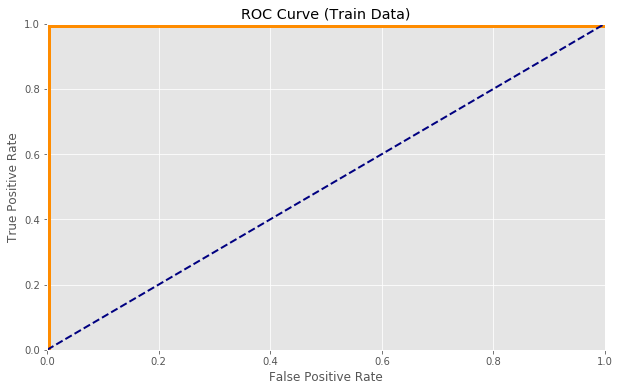

In [62]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(10, 6))
def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, color='darkorange', linewidth=8, label=label) 
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.axis([0, 1, 0, 1])
    plt.title('ROC Curve (Train Data)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

## Area Under the ROC Curve

In [63]:
# Area under ROC curve
roc_auc_score(y_train,y_scores)

1.0

# Precision-Recall Curve

We can plot precision and recall as functions of the threshold values.

Then, we can select the threshold value that gives the best precision/recall tradeoff for our problem. 

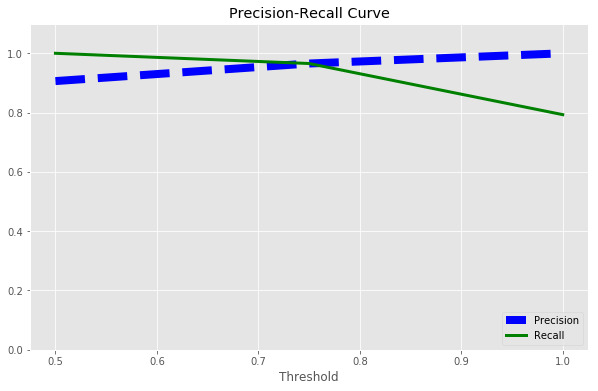

In [64]:
plt.style.use('ggplot')

# Get the 2nd column of the matrix of predicted probabilities for each data point
#    The 2nd column stores the probalities of the positive class
y_scores = cross_val_predict(knn, X_train, y_train, method="predict_proba", cv=3)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)


fig = plt.figure(figsize=(10, 6))
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--",  linewidth=8, label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-",  linewidth=3, label="Recall") 
    plt.xlabel("Threshold")
    plt.legend(loc="lower right")
    plt.title('Precision-Recall Curve')
    #plt.xlim([0, 1])
    plt.ylim([0, 1.1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

# Observation from Precision-Recall Tradeoff Curve

From the above graph, we observe that the recall starts decreasing from 0.6 threshold.


# Performance Measures for Varying Threshold

We have computed the performance measures (precision, recall, F1 score, & confusion matrix) based on the default threshold 0.5.

It is possible to improve performance of a classifier (precision and/or recall) by setting its threshold to a new value.

For the binary classification of the Iris dataset we already achieved the optimal precision and recall. Thus, there is no need to make precision-recall tradeoff.

But it's important to know how to do this.

In [65]:
print("Performance Measures Based on the Default Threshold:\n")


y_train_pred = cross_val_predict(knn, X_train, y_train, cv=5)

# Precision, Recall, F1 Score and Confusion Matrix for the Default Threshold 0.5
precision_train = precision_score(y_train, y_train_pred) 
print("Precision (Default Threshold 0.5) = %f" % precision_train)

recall_train = recall_score(y_train, y_train_pred)
print("Recall (Default Threshold 0.5) = %f" % recall_train)


f1_train = f1_score(y_train, y_train_pred)
print("F1 Score (Default Threshold 0.5) = %f" % f1_train)

print("Confusion Matrix (Default Threshold 0.5)\n", confusion_matrix(y_train, y_train_pred))


print("\n-------------------------------------------------------\n")
print("Performance Measures Based on a New Threshold:")

# Precision, Recall, F1 Score and Confusion Matrix for different threshold

t = 0.4 # threshold 

# Compute predictions based on new t by using the following method:
#  - Get the probability of the positive class from the 2nd column [:, 1]
#  - If that probability is greater than or equal to t, then the test data belongs to the positive class
y_train_predicted_new = (cross_val_predict(knn, X_train, y_train, method="predict_proba", cv=3)[:,1] > t).astype(int)


precision = precision_score(y_train, y_train_predicted_new) 
print("\nPrecision (Threshold %.2f) = %f" % (t, precision))

recall = recall_score(y_train, y_train_predicted_new)
print("Recall (Threshold %.2f) = %f" % (t, recall))


f1 = f1_score(y_train, y_train_predicted_new)
print("F1 Score = (Threshold %.2f) = %f" % (t, f1))


print("Confusion Matrix (Threshold %.2f)" %  t) 
print(confusion_matrix(y_train, y_train_predicted_new))


Performance Measures Based on the Default Threshold:

Precision (Default Threshold 0.5) = 1.000000
Recall (Default Threshold 0.5) = 1.000000
F1 Score (Default Threshold 0.5) = 1.000000
Confusion Matrix (Default Threshold 0.5)
 [[61  0]
 [ 0 29]]

-------------------------------------------------------

Performance Measures Based on a New Threshold:

Precision (Threshold 0.40) = 0.906250
Recall (Threshold 0.40) = 1.000000
F1 Score = (Threshold 0.40) = 0.950820
Confusion Matrix (Threshold 0.40)
[[58  3]
 [ 0 29]]


## Observation from Varying Threshold

From the above results we observe that by setting a new threshold (t = 0.4), we can change the performance of a classifier.

For this example, setting threshold to a different value doesn't bring any benefit. But it is a useful technique to remember for making optimal tradeoff between precision and recall.

# Evaluate The Model Using Test Data

The KNeighborsClassifier model has a default "score" function that computes the accuracy of the model.

Often times the accuracy is not a good measure.

We also compute the other performance measures, such as the confusion matrix, precision, recall, and the F1 score for the test data.

## Confusion Matrix for Test Data

In [66]:
# The accuracy of the model
test_accuracy_knn = knn.score(X_test, y_test)
print("\nTest Accuracy: ", test_accuracy_knn)


# No. of Correct Predictions
y_test_predicted = knn.predict(X_test)
print("\nNo. of correct predictions (Test): %d/%d" % (np.sum(y_test_predicted == y_test), len(y_test)))



# Confusion Matrix
print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test, y_test_predicted))


Test Accuracy:  0.9

No. of correct predictions (Test): 54/60

Confusion Matrix (Test Data):
 [[38  1]
 [ 5 16]]


## Precision, Recall & F1 Score for Test Data

In [67]:
precision = precision_score(y_test, y_test_predicted) 
print("Precision = %f" % precision)

recall = recall_score(y_test, y_test_predicted)
print("Recall = %f" % recall)


f1 = f1_score(y_test, y_test_predicted)
print("F1 Score = %f" % f1)


Precision = 0.941176
Recall = 0.761905
F1 Score = 0.842105


## ROC Curve for Test Data

In [68]:
# Get the 2nd column of the matrix of predicted probabilities for each data point
#    The 2nd column stores the probalities of the positive class
y_scores_test = cross_val_predict(knn, X_test, y_test, method="predict_proba", cv=3)[:, 1]

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_scores_test)


print("\nFPR FPR & TPR for Various Threshold Values:")
print("FPR: ", fpr_test)
print("TPR: ", tpr_test)
print("\nThresholds: ", thresholds_test)


FPR FPR & TPR for Various Threshold Values:
FPR:  [0.         0.         0.02564103 0.15384615 0.25641026 1.        ]
TPR:  [0.         0.57142857 0.76190476 0.9047619  1.         1.        ]

Thresholds:  [2.   1.   0.75 0.5  0.25 0.  ]


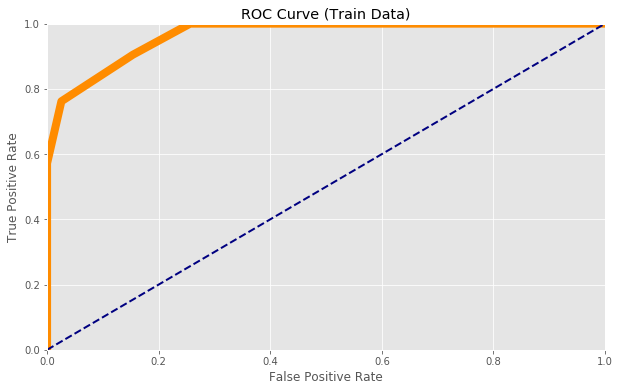

In [69]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(10, 6))
plot_roc_curve(fpr_test, tpr_test)
plt.show()

## Area Under the ROC Curve (Test Data)

In [70]:
# Area under ROC curve
roc_auc_score(y_test,y_scores_test)

0.9652014652014652

## Confusion Matrix

Using pandas crosstab, we create a better visualization of the confusion matrix.

In [71]:
pd.crosstab(y_test, y_test_predicted, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,38,1,39
1,5,16,21
All,43,17,60


## Summary of Classification Metrics

We can build a text report showing the main classification metrics.

In [72]:
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93        39
           1       0.94      0.76      0.84        21

   micro avg       0.90      0.90      0.90        60
   macro avg       0.91      0.87      0.88        60
weighted avg       0.90      0.90      0.90        60

